<a href="https://colab.research.google.com/github/okzeesh/CS-351-AI-Lab-Github-repository-2022644/blob/main/k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **k-Means Clustering: Manpower vs. Work Done**

This project demonstrates the implementation of the k-Means clustering algorithm using manpower and work done data. The goal is to group the data points into clusters based on their similarity using the Euclidean distance metric. The clustering process is visualized step-by-step for clarity.

## Table of Contents
1. [Project Overview](#project-overview)
2. [Dataset](#dataset)
3. [Installation](#installation)
4. [Usage](#usage)
5. [Code Overview](#code-overview)
6. [Visualization](#visualization)
7. [Contributing](#contributing)
8. [License](#license)

## Project Overview
This project aims to:
- Cluster the data points based on manpower and work done using k-Means.
- Visualize each step of the k-Means algorithm, including:
  - Initialization of centroids.
  - Assignment of data points to the closest centroids.
  - Update of centroids based on the mean of assigned points.
- The dataset consists of two features:
  - **Manpower** (X-axis)
  - **Work Done** (Y-axis)

## Dataset
The dataset includes the following values for manpower and corresponding work done:

| Manpower | Work Done |
|----------|-----------|
| 20       | 50        |
| 10       | 25        |
| 15       | 37        |
| 40       | 100       |
| 50       | 120       |
| 60       | 150       |
| 80       | 200       |
| 100      | 250       |
| 120      | 300       |
| 150      | 370       |
| 200      | 500       |

### Output:
- The script will run the k-Means algorithm for a specified number of clusters (k) and visualize:
  1. Initial centroids.
  2. Data point assignments to clusters in each iteration.
  3. Centroid updates in each iteration.
  
By default, `k = 3`, but you can adjust this value in the script as needed.

## Code Overview
- **Step 1:** Import necessary libraries (`numpy`, `matplotlib`, `scikit-learn`).
- **Step 2:** Prepare the dataset by combining manpower and work done into a single feature set.
- **Step 3:** Standardize the features using `StandardScaler` to ensure all features have the same scale.
- **Step 4:** Define the k-Means algorithm with a custom implementation:
  - **Step 1:** Randomly initialize the centroids.
  - **Step 2:** Assign each data point to the closest centroid using Euclidean distance.
  - **Step 3:** Recalculate centroids based on the mean of assigned points.
  - Repeat until convergence (no change in centroids).
- **Step 5:** Visualize each step of the k-Means process.

## Visualization
During the clustering process, the following visualizations are provided:
1. **Initial Centroids:** A scatter plot showing the starting centroids.
2. **Data Point Assignment:** A visualization after each iteration showing which cluster each data point belongs to.
3. **Centroid Update:** A plot showing the recalculated centroids after each iteration.

The clustering process continues until the centroids no longer change.

---

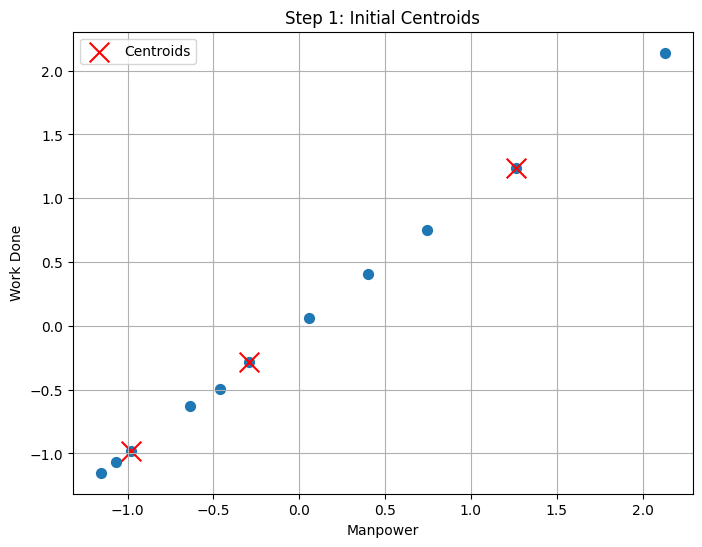

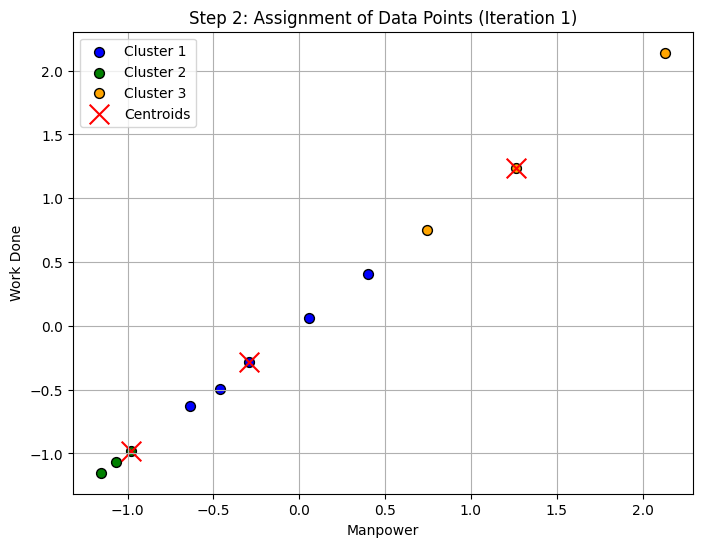

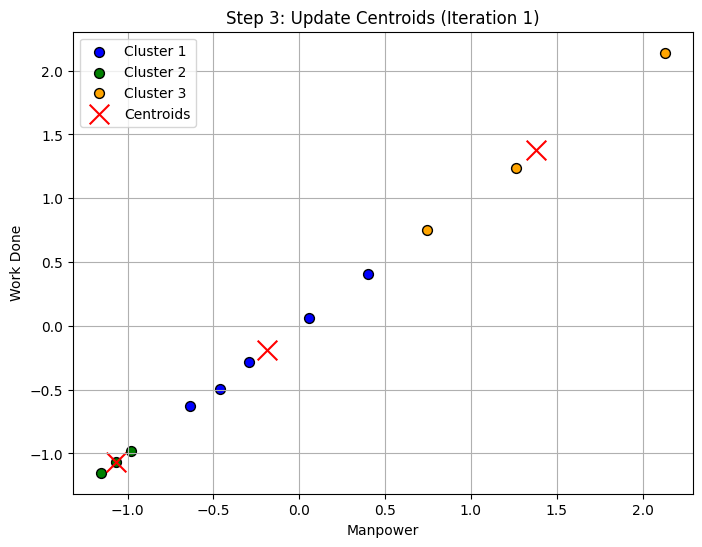

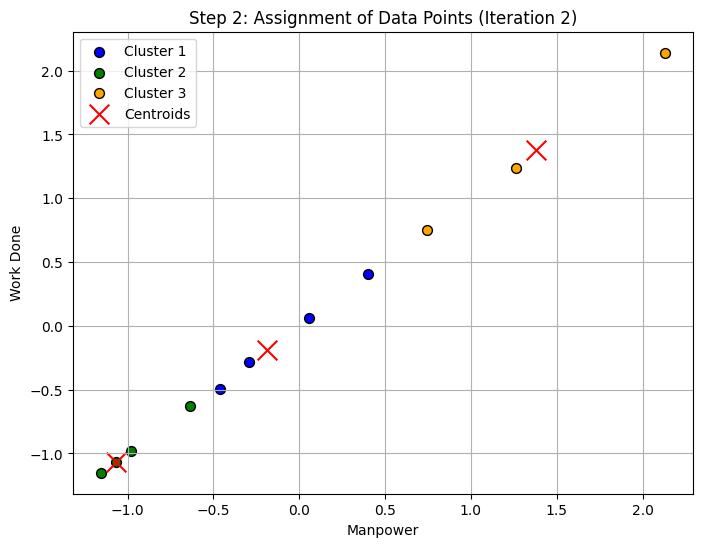

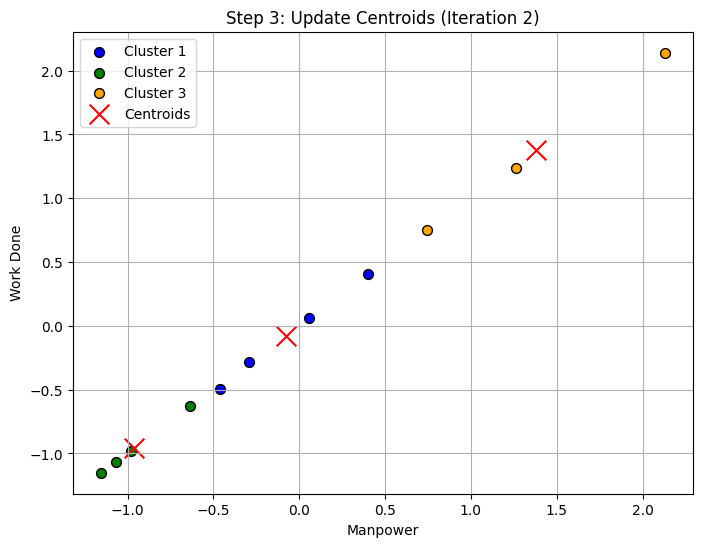

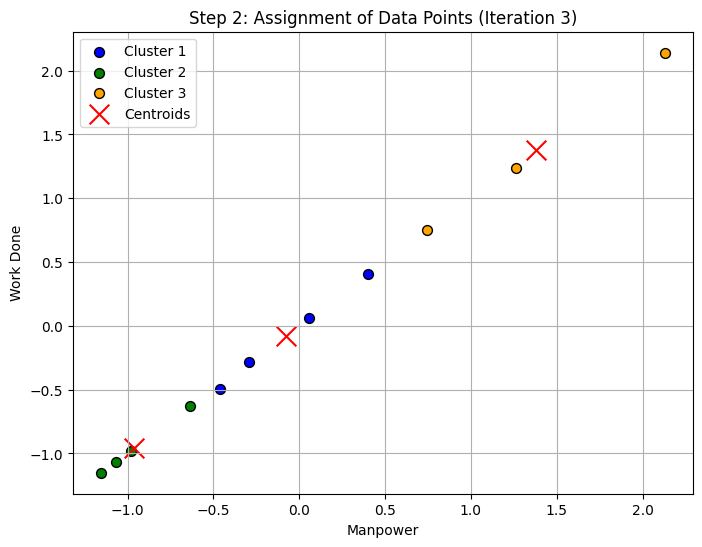

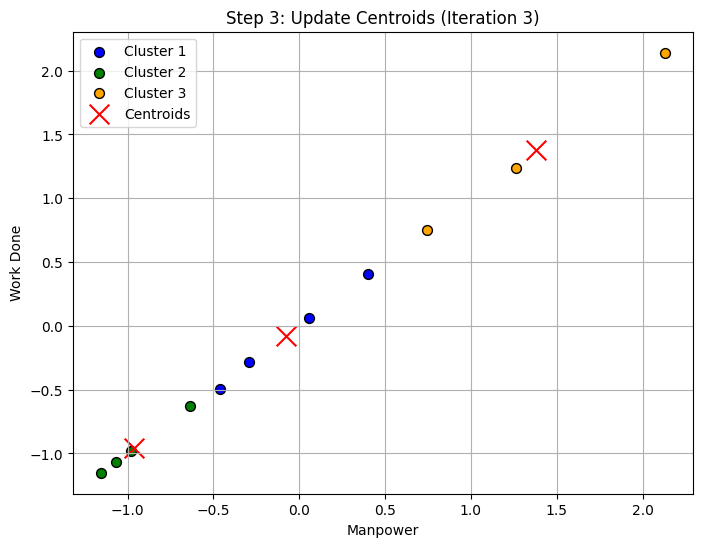

In [1]:
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Provided data for manpower and work done
manpower = np.array([20, 10, 15, 40, 50, 60, 80, 100, 120, 150, 200]).reshape(-1, 1)
workdone = np.array([50, 25, 37, 100, 120, 150, 200, 250, 300, 370, 500]).reshape(-1, 1)

# Combine both features into a single dataset for clustering
X = np.hstack((manpower, workdone))

# Standardize the features to ensure all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change, break the loop (algorithm converged)
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# Function to visualize clustering process at each step, with class names in the legend
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names and their corresponding colors
    class_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
    colors = ['blue', 'green', 'orange']

    # Plot data points with labels if they exist
    if labels is not None:
        for class_label in np.unique(labels):
            plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                        label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel('Manpower')
    plt.ylabel('Work Done')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # Adjust the number of clusters as needed

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)
